# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

In [32]:
# Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test.
import numpy as np
import pandas as pd
from scipy import stats

# load data into a DataFrame and remove any rows with missing values
df = pd.read_csv('data/tidal_wetland_estuaries.csv').replace(-9999, np.nan).dropna()
df.head()



,name,coast,estu_latitude,estu_longintude,estu_dep,estu_perim,land_area,land_latitude,land_longitude,population,...,ocean_salinity_mean,air_temp_mean,frost_days_per_yr,ocean_sst_mean,ocean_diss_inorg_p,ocean_no3,tide_flow,mean_precip,mean_temp,soc_density
0,Florida Bay,GULF,25.039940,-80.731770,0.62000,614000.000,9.048954e+08,25.187310,-80.727540,3421.0,...,36.2,24.4,0.0,26.50,0.07,0.810,1.000000e+09,1251.831801,24.594719,0.087
1,South Ten Thousand Islands,GULF,25.311330,-81.057020,0.63000,597000.000,3.069216e+09,25.440250,-80.791070,235792.0,...,36.1,24.6,0.0,26.40,0.08,0.780,3.000000e+08,1355.907147,24.320596,0.000
2,North Ten Thousand Islands,GULF,25.724280,-81.377640,0.73000,906000.000,4.921106e+09,25.982520,-81.273680,9268.0,...,36.0,24.1,0.0,26.30,0.09,0.790,6.000000e+08,1416.239789,23.873671,0.084
3,Rookery Bay,GULF,25.998750,-81.756010,0.50000,148000.000,3.304589e+08,26.042920,-81.677710,14858.0,...,36.0,23.9,0.0,26.10,0.08,0.670,4.000000e+07,1432.519416,23.510000,0.086
4,Charlotte Harbor,GULF,26.754031,-82.103018,1.65938,507261.119,1.169284e+10,27.167615,-81.772154,597644.0,...,35.9,23.2,1.0,25.65,0.10,0.545,7.000000e+08,1320.275690,22.869199,0.073


In [33]:
# create separate arrays for soc_density values for East and West coast
east_coast = df.loc[df['coast'] == 'EAST', 'soc_density']
west_coast = df.loc[df['coast'] == 'WEST', 'soc_density']


In [34]:
#perform two-sample t-test
t, p_value = stats.ttest_ind(east_coast, west_coast)

if p_value < 0.05:
    print("The t-test result is statistically significant with p-value =", p_value, ". Therefore, we reject the null hypothesis and conclude that soil organic carbon density is larger in the East coast than the West coast.")
else:
    print("The t-test result is not statistically significant with p-value =", p_value, ". Therefore, we fail to reject the null hypothesis and cannot conclude that there is a difference in soil organic carbon density between the East and West coasts.")

The t-test result is statistically significant with p-value = 1.1530568956025483e-12 . Therefore, we reject the null hypothesis and conclude that soil organic carbon density is larger in the East coast than the West coast.


I used a two-sample t-test assuming unequal variances because we are comparing the means of two independent groups with potentially different variances. In this case, we are comparing the soil organic carbon densities of wetlands on the East coast and the West coast, which are two independent groups. It is possible that the East and West coasts have different variances since they have different environmental conditions, vegetation, and land-use histories.

In [35]:
#Do the data meet the requirement for normal data? Why or why not? (2 pt) 

east_stat, east_p = stats.shapiro(east_coast)
west_stat, west_p = stats.shapiro(west_coast)

# interpret normality test result
if east_p > 0.05 and west_p > 0.05:
    print("The data meet the assumption of normality for both groups with p-values of", east_p, "and", west_p, "for the East and West coast, respectively.")
else:
    print("The data do not meet the assumption of normality for at least one group with p-values of", east_p, "and", west_p, "for the East and West coast, respectively.")

The data meet the assumption of normality for both groups with p-values of 0.09766162186861038 and 0.0792006105184555 for the East and West coast, respectively.


## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

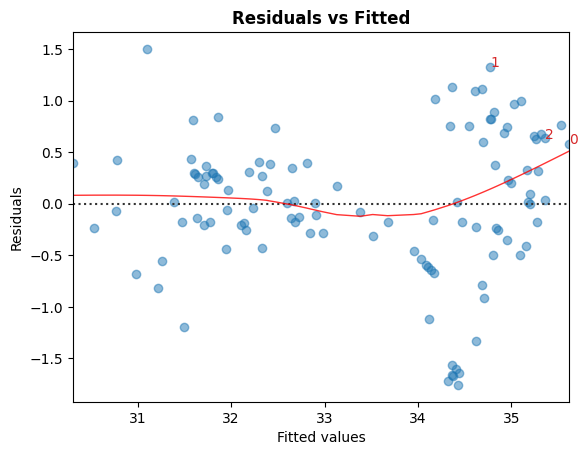

In [36]:
from utils import Linear_Reg_Diagnostic # do not change!
import statsmodels.formula.api as smf 

df = pd.read_csv('data/tidal_wetland_estuaries.csv').replace(-9999, np.nan).dropna()

X = df[['soc_density', 'mean_precip', 'ocean_sst_mean']]
y = df['ocean_salinity_mean']

model = smf.ols('y ~ X', data=df).fit()

diag = Linear_Reg_Diagnostic(model)
diag.residual_plot();


In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     171.4
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.62e-41
Time:                        21:49:18   Log-Likelihood:                -118.40
No. Observations:                 114   AIC:                             244.8
Df Residuals:                     110   BIC:                             255.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.7011      0.303    101.386      0.000      30.101      31.301
X[0]           8.1204      2.365      3.433      0.001       3.433      12.808
X[1]          -0.0011      0.000     -7.732      0.000      -0.001      -0.001
X[2]           0.2120      0.010     20.463      0.000       0.191       0.232
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.146
Skew:                          -0.582   Prob(JB):                       0.0281
Kurtosis:                       3.384   Cond. No.                     5.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
diag.vif_table()

    Features  VIF Factor
3       X[2]        1.01
1       X[0]        1.03
2       X[1]        1.04
0  Intercept       21.58


The R-squared value of 0.82 indicates that the regression model explains 82% of the variance in electricity production using the independent variable(s). The positive coefficient (0.2120) suggests that an increase in the independent variable is associated with an increase in electricity production. However, the negative coefficient (-0.0011) suggests that there may be another factor that has a diminishing return on electricity production, meaning that as the level of this factor increases, it may have less of an impact on electricity production.

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

Text(0, 0.5, 'Electricity Production (MWh)')

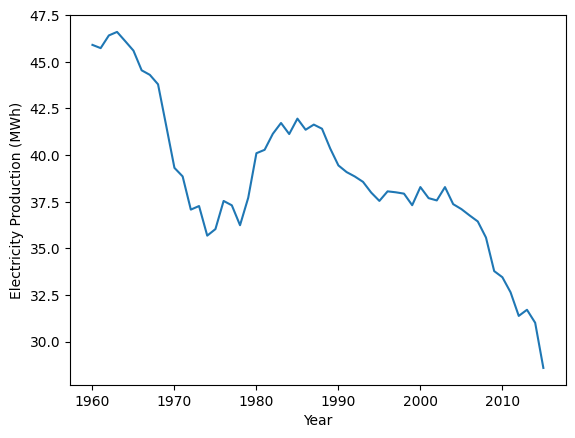

In [39]:
import matplotlib.pyplot as plt
df = pd.read_csv('data/coal-production.csv')
df['year'] = pd.to_datetime(df['year'], format='%Y')
df = df.set_index('year')
fig, ax = plt.subplots()
ax.plot(df)
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Production (MWh)')

In [40]:
#test for stationarity
from statsmodels.tsa.stattools import adfuller


def adf_print(time_series):
    adf_output = adfuller(time_series)
    stat = adf_output[0]
    pval = adf_output[1]
    print('ADF Statistic:', stat)
    print('p-value:', pval)
    return None

adf_print(df['electricity_prod'])

ADF Statistic: 1.8721544326758202
p-value: 0.9984818799941668


Since our p value is very large, we accept the null hypothesis that out time series in not stationary. 

In [41]:
#Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)
from pmdarima import auto_arima
auto_arima_model = auto_arima(df['electricity_prod'])
print(auto_arima_model.summary())

#The ARIMA model that was found to be the best fit is the ARIMA(1,1,1) model.


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -71.684
Date:                Tue, 25 Apr 2023   AIC                            149.368
Time:                        21:49:21   BIC                            155.390
Sample:                    01-01-1960   HQIC                           151.697
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.140      6.074      0.000       0.574       1.121
ma.L1         -0.6020      0.230     -2.622      0.009      -1.052      -0.152
sigma2         0.7894      0.171      4.604      0.0

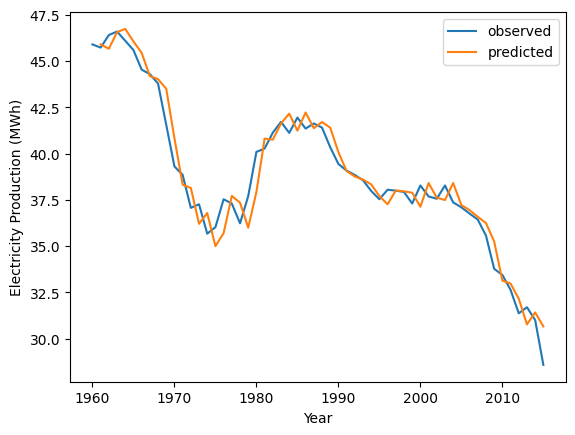

In [42]:
#Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)
in_samp_pred = auto_arima_model.predict_in_sample()

fig, ax = plt.subplots()
ax.plot(df, label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Production (MWh)')
ax.legend();


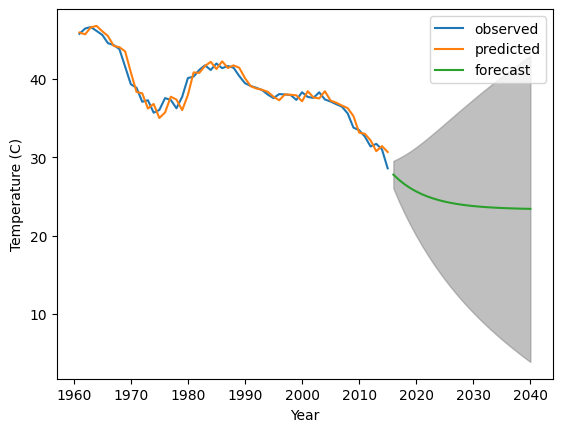

In [43]:
# Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)
forecast, ci = auto_arima_model.predict(25, return_conf_int=True)

fig, ax = plt.subplots()
ax.plot(df['electricity_prod'][1:], label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.plot(forecast, label='forecast')
ax.fill_between(forecast.index, ci[:,0], ci[:,1], color = 'gray', alpha=0.5) # our confidence intervals
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.legend();
